# How to use GCRCatalogs

by Yao-Yuan Mao (last update: 5/1/2018)

Links to GitHub code repos: [GCRCatalogs](https://github.com/LSSTDESC/gcr-catalogs) and [GCR](https://github.com/yymao/generic-catalog-reader)

**Note: You should be running this notebook at https://jupyter-dev.nersc.gov **

In [1]:
## Note: if you clone the gcr-catalogs repo and are running this under the `examples` folder,
## you can also use your version of GCRCatalogs:
#import sys
#sys.path.insert(0, '..')

## The following lines are to check if you're in the lsst group
import subprocess
assert u'lsst' in subprocess.check_output(['groups']).decode().split(), 'You need to be in the `lsst` group for this notebook to work'

In [2]:
## You must import other packages after `sys.path.insert`
import numpy as np

## The basics:

- `get_available_catalogs()` lists available catlaogs; returns `dict`.
- `load_catalog()` loads the catalog you want; returns an instance of `GCR.BaseGenericCatalog`

In [3]:
import GCRCatalogs

## check version
print('GCRCatalogs =', GCRCatalogs.__version__, '|' ,'GCR =', GCRCatalogs.GCR.__version__)

GCRCatalogs = 0.8.0 | GCR = 0.7.2


In [4]:
## find available catlaogs, sorted by their name

print('\n'.join(sorted(GCRCatalogs.get_available_catalogs())))

buzzard
buzzard_high-res
buzzard_test
dc1
dc2_coadd_run1.1p
dc2_coadd_run1.1p_tract4850
focal_plane_0_test
focal_plane_16_test
hsc-pdr1-xmm
protoDC2


In [5]:
## find *all* available catlaogs, sorted by their name

print('\n'.join(sorted(GCRCatalogs.get_available_catalogs(include_default_only=False))))

buzzard
buzzard_high-res
buzzard_high-res_v1.1
buzzard_test
buzzard_v1.6
buzzard_v1.6_1
buzzard_v1.6_2
buzzard_v1.6_21
buzzard_v1.6_3
buzzard_v1.6_5
buzzard_v1.6_test
cosmoDC2_v0.1
cosmoDC2_v0.1_test
dc1
dc2_coadd_run1.1p
dc2_coadd_run1.1p_tract4850
dc2_instance_example1
dc2_instance_example2
dc2_reference_run1.1
dc2_reference_run1.2
dc2_truth_run1.1
focal_plane_0_test
focal_plane_16_test
hsc-pdr1-xmm
proto-dc2_v2.0
proto-dc2_v2.0_redmapper
proto-dc2_v2.0_test
proto-dc2_v2.1
proto-dc2_v2.1.1
proto-dc2_v2.1.2
proto-dc2_v2.1.2_addon_knots
proto-dc2_v2.1.2_test
proto-dc2_v3.0
proto-dc2_v3.0_addon_knots
proto-dc2_v3.0_redmapper
proto-dc2_v3.0_test
proto-dc2_v4.3_redmapper
proto-dc2_v4.4
proto-dc2_v4.4_test
proto-dc2_v4.5
proto-dc2_v4.5_test
proto-dc2_v4.6.1
proto-dc2_v4.6.1_test
proto-dc2_v4.7_test
proto-dc2_v5.0
proto-dc2_v5.0_test
protoDC2
protoDC2_addon_tidal
protoDC2_test
um_v0.1
um_v0.1_shear_test
um_v0.1_test


In [6]:
## load 'protoDC2' catalog

gc = GCRCatalogs.load_catalog('protoDC2_test') # use 'protoDC2_test' to skip md5 check (which takes a while)
#gc = GCRCatalogs.load_catalog('protoDC2')

/global/common/software/lsst/common/miniconda/current/lib/python3.6/site-packages/GCRCatalogs/alphaq.py:105: UserWarning: No md5 sum specified in the config file
  warnings.warn('No md5 sum specified in the config file')


## GCR interface

See also the [full GCR API Documentation](https://yymao.github.io/generic-catalog-reader/index.html).

### quantities

- `get_quantities()` loads the quantities you need; takes a `list` and returns `dict`.
- `has_quantity()` and `has_quantities()` can check if the quantities you need exist; both return `bool`.
- `list_all_quantities()` lists all available catlaogs; returns `list`.

In [7]:
gc.get_quantities(['mag_u_lsst', 'ra', 'dec'])

{'mag_u_lsst': array([ 21.2349205 ,  21.83907318,  21.02371979, ...,  26.76194382,
         33.03851318,  28.94227791], dtype=float32),
 'dec': array([-1.78091323, -2.06204367, -1.48433971, ...,  2.43747878,
         2.49400425,  2.37360001], dtype=float32),
 'ra': array([-0.21326847, -1.29391468,  0.68152297, ..., -2.39075041,
        -2.46616554, -2.31633687], dtype=float32)}

In [8]:
gc.has_quantity('mag_u_lsst')

True

In [9]:
gc.has_quantities(['mag_u_lsst', 'ra', 'dec'])

True

In [10]:
## Only returns `True` if *all* quantities exist
gc.has_quantities(['mag_u_lsst', 'ra', 'dec', 'quantitiy_that_does_not_exist'])

False

In [11]:
print(', '.join(sorted(gc.list_all_quantities())))

A_v, A_v_bulge, A_v_disk, Mag_true_Y_lsst_z0, Mag_true_Y_lsst_z0_no_host_extinction, Mag_true_g_lsst_z0, Mag_true_g_lsst_z0_no_host_extinction, Mag_true_g_sdss_z0, Mag_true_g_sdss_z0_no_host_extinction, Mag_true_i_lsst_z0, Mag_true_i_lsst_z0_no_host_extinction, Mag_true_i_sdss_z0, Mag_true_i_sdss_z0_no_host_extinction, Mag_true_r_lsst_z0, Mag_true_r_lsst_z0_no_host_extinction, Mag_true_r_sdss_z0, Mag_true_r_sdss_z0_no_host_extinction, Mag_true_u_lsst_z0, Mag_true_u_lsst_z0_no_host_extinction, Mag_true_u_sdss_z0, Mag_true_u_sdss_z0_no_host_extinction, Mag_true_y_lsst_z0, Mag_true_y_lsst_z0_no_host_extinction, Mag_true_z_lsst_z0, Mag_true_z_lsst_z0_no_host_extinction, Mag_true_z_sdss_z0, Mag_true_z_sdss_z0_no_host_extinction, R_v, R_v_bulge, R_v_disk, bulge_to_total_ratio_i, convergence, dec, dec_true, ellipticity_1_bulge_true, ellipticity_1_disk_true, ellipticity_1_true, ellipticity_2_bulge_true, ellipticity_2_disk_true, ellipticity_2_true, ellipticity_bulge_true, ellipticity_disk_true,

### accessing native quantities

Native quantities are quantities that have not yet be homogenized (to common labels/units).
However, you can still access them as long as you know what you are doing. 

In [12]:
## print out the first 5 native quantities

print('\n'.join(sorted(gc.list_all_native_quantities())[:5]))

LSST_filters/diskLuminositiesStellar:LSST_g:observed
LSST_filters/diskLuminositiesStellar:LSST_g:observed:dustAtlas
LSST_filters/diskLuminositiesStellar:LSST_g:rest
LSST_filters/diskLuminositiesStellar:LSST_g:rest:dustAtlas
LSST_filters/diskLuminositiesStellar:LSST_i:observed


In [13]:
gc.get_quantities(['emissionLines/diskLineLuminosity:balmerAlpha6563:rest',
                   'emissionLines/diskLineLuminosity:balmerAlpha6563:rest:contam_nitrogenII6584'])

{'emissionLines/diskLineLuminosity:balmerAlpha6563:rest:contam_nitrogenII6584': array([  1.79731992e+04,   4.82188232e+03,   1.75805672e+05, ...,
          7.59017440e+07,   4.07198267e+03,   6.16850000e+03], dtype=float32),
 'emissionLines/diskLineLuminosity:balmerAlpha6563:rest': array([  1.76363730e+04,   4.74945703e+03,   1.73469531e+05, ...,
          7.58312000e+07,   4.01797803e+03,   6.08336523e+03], dtype=float32)}

You can also rename the native quantities by using `add_quantity_modifier()`. For example:

In [14]:
gc.add_quantity_modifier('balmer_alpha_6563', 'emissionLines/diskLineLuminosity:balmerAlpha6563:rest')
gc.get_quantities(['balmer_alpha_6563'])

{'balmer_alpha_6563': array([  1.76363730e+04,   4.74945703e+03,   1.73469531e+05, ...,
          7.58312000e+07,   4.01797803e+03,   6.08336523e+03], dtype=float32)}

To get all native quantities that match a regex

In [15]:
import re

data = gc.get_quantities([q for q in gc.list_all_quantities() if re.match(r'sed_\d+_\d+$', q)])
list(data.keys())

['sed_9395_583',
 'sed_3812_236',
 'sed_1246_306',
 'sed_5467_339',
 'sed_6954_431',
 'sed_1000_246',
 'sed_15143_2259',
 'sed_3184_197',
 'sed_2407_591',
 'sed_4565_283',
 'sed_1933_474',
 'sed_3381_209',
 'sed_5148_319',
 'sed_6166_382',
 'sed_13177_1966',
 'sed_5806_360',
 'sed_7843_486',
 'sed_1552_381',
 'sed_8846_549',
 'sed_4299_266',
 'sed_6548_406',
 'sed_11467_1710',
 'sed_4848_300',
 'sed_7385_458',
 'sed_2998_186',
 'sed_3590_222',
 'sed_8329_517',
 'sed_9978_1489',
 'sed_4048_251',
 'sed_17402_2596']

### more info about the catalog

- `lightcone` is a `bool`
- `cosmology` is a instance of `astropy.cosmology.FLRW`
- `get_input_kwargs()` returns a `dict` (when no argument) from the orignal yaml config file. 
  If a argument if passed, it returns the corresponding value for key=argument

In [16]:
gc.lightcone

True

In [17]:
gc.cosmology

FlatLambdaCDM(H0=71 km / (Mpc s), Om0=0.265, Tcmb0=0 K, Neff=3.04, m_nu=None, Ob0=0.0448)

In [18]:
gc.version

'5.0'

In [19]:
print(gc.get_catalog_info('description'))

ProtoDC2 is a down-scaled version of the catalog to be generated for LSST-DESC DC2.
For a description of the catalog and the methods, please see https://goo.gl/fXDQwP



In [20]:
print(gc.get_catalog_info())

{'subclass_name': 'alphaq.AlphaQGalaxyCatalog', 'filename': '/global/projecta/projectdirs/lsst/groups/CS/descqa/catalog/v5.0.all.hdf5', 'lightcone': True, 'version': '5.0', 'creators': ['Andrew Benson', 'Andrew Hearin', 'Katrin Heitmann', 'Joe Hollowed', 'Danila Korytov', 'Eve Kovacs', 'Patricia Larsen'], 'description': 'ProtoDC2 is a down-scaled version of the catalog to be generated for LSST-DESC DC2.\nFor a description of the catalog and the methods, please see https://goo.gl/fXDQwP\n'}


In [21]:
for q in sorted(gc.list_all_quantities())[:20]:
    print(q, gc.get_quantity_info(q))

A_v None
A_v_bulge None
A_v_disk None
Mag_true_Y_lsst_z0 {'units': 'AB magnitude'}
Mag_true_Y_lsst_z0_no_host_extinction {'units': 'AB magnitude'}
Mag_true_g_lsst_z0 {'units': 'AB magnitude'}
Mag_true_g_lsst_z0_no_host_extinction {'units': 'AB magnitude'}
Mag_true_g_sdss_z0 {'units': 'AB magnitude'}
Mag_true_g_sdss_z0_no_host_extinction {'units': 'AB magnitude'}
Mag_true_i_lsst_z0 {'units': 'AB magnitude'}
Mag_true_i_lsst_z0_no_host_extinction {'units': 'AB magnitude'}
Mag_true_i_sdss_z0 {'units': 'AB magnitude'}
Mag_true_i_sdss_z0_no_host_extinction {'units': 'AB magnitude'}
Mag_true_r_lsst_z0 {'units': 'AB magnitude'}
Mag_true_r_lsst_z0_no_host_extinction {'units': 'AB magnitude'}
Mag_true_r_sdss_z0 {'units': 'AB magnitude'}
Mag_true_r_sdss_z0_no_host_extinction {'units': 'AB magnitude'}
Mag_true_u_lsst_z0 {'units': 'AB magnitude'}
Mag_true_u_lsst_z0_no_host_extinction {'units': 'AB magnitude'}
Mag_true_u_sdss_z0 {'units': 'AB magnitude'}


/global/common/software/lsst/common/miniconda/current/lib/python3.6/site-packages/GCRCatalogs/alphaq.py:366: UserWarning: This value is composed of a function on native quantities. So we have no idea what the units are
  warnings.warn('This value is composed of a function on native quantities. So we have no idea what the units are')


### use filters

You can specify `filters` in `get_quantities` to select a subset of data. 
Note that `filters` always takes a list.

In [22]:
# note that we use a list even there is only one filter

data = gc.get_quantities(['stellar_mass', 'ra', 'dec'], filters=['stellar_mass > 1e10']) 
print((data['stellar_mass'] > 1e10).all())

True


In [23]:
## You can use more than one filter.

data = gc.get_quantities(['stellar_mass'], filters=['ra < -2', 'dec > 1'])
print(len(data['stellar_mass']))

data_check = gc.get_quantities(['ra', 'dec'])
print(np.count_nonzero((data_check['ra'] < -2) & (data_check['dec'] > 1)))

570847
570847


In [24]:
# For more complicated filters, specify them as tuple of (callable, quantity1, quantity2, ...)

data = gc.get_quantities(['stellar_mass'], filters=[(np.isfinite, 'stellar_mass')])

#### native filters

Some catalogs (currently only buzzard and buzzard_high-res) support "native filters", which you can use to load only a subset of data more efficiently. 

Note that `native_filters` only takes a list of tuples, in the form of `[(callable, quantity1, quantity2, ...), ...]`

In [25]:
gc_buzzard = GCRCatalogs.load_catalog('buzzard')
print(gc_buzzard._native_filter_quantities)

data = gc_buzzard.get_quantities(['ra', 'dec'], native_filters=[(lambda p: p==1, 'healpix_pixel')])
print(data['ra'].min(), data['ra'].max(), data['dec'].min(), data['dec'].max())

{'healpix_pixel'}
44.9959447517 56.2350032152 4.77918879056 14.4744615426


### more tips on using the quantities

#### tip 1
`get_quantities()` returns a dictionary, which you can easily turn into a `astropy.table.Table` or `pandas.DataFrame`

In [26]:
data = gc.get_quantities(['mag_u_lsst', 'ra', 'dec'])

In [27]:
import pandas as pd
pd.DataFrame(data)

,dec,mag_u_lsst,ra
0,-1.780913,21.234921,-0.213268
1,-2.062044,21.839073,-1.293915
2,-1.484340,21.023720,0.681523
3,-0.923260,17.603844,-0.304187
4,-0.874825,19.314825,-0.261973
5,-0.924046,16.110458,-1.786836
6,-0.909357,18.208616,-1.753474
7,-1.523700,17.888836,-0.262022
8,-1.700855,18.595100,0.072298
9,-1.490176,22.120970,0.063725


In [28]:
from astropy.table import Table
Table(data)

mag_u_lsst,dec,ra
float32,float32,float32
21.2349,-1.78091,-0.213268
21.8391,-2.06204,-1.29391
21.0237,-1.48434,0.681523
17.6038,-0.92326,-0.304187
19.3148,-0.874825,-0.261973
16.1105,-0.924046,-1.78684
18.2086,-0.909357,-1.75347
17.8888,-1.5237,-0.262022
18.5951,-1.70086,0.0722983


#### tip 2

Sometimes you can allow slightly different quantiies (for example, lsst u band and sdss u band) when comparing different catalogs. In this case, you can use `first_available()` to get the first available of the given catalog.

In [29]:
gc.first_available('mag_u_des', 'mag_u_sdss', 'mag_u_lsst')

/global/common/software/lsst/common/miniconda/current/lib/python3.6/site-packages/GCR.py:216: UserWarning: mag_u_des not available; using mag_u_sdss instead
  warnings.warn('{} not available; using {} instead'.format(quantities[0], q))


'mag_u_sdss'

### Here's a full example

In [30]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
catalogs = ('protoDC2_test', 'buzzard_test')
gc_all = dict(zip(catalogs, (GCRCatalogs.load_catalog(c) for c in catalogs)))

/global/common/software/lsst/common/miniconda/current/lib/python3.6/site-packages/GCRCatalogs/alphaq.py:105: UserWarning: No md5 sum specified in the config file
  warnings.warn('No md5 sum specified in the config file')


/global/common/software/lsst/common/miniconda/current/lib/python3.6/site-packages/GCR.py:216: UserWarning: mag_g_lsst not available; using mag_g_des instead
  warnings.warn('{} not available; using {} instead'.format(quantities[0], q))
/global/common/software/lsst/common/miniconda/current/lib/python3.6/site-packages/GCR.py:216: UserWarning: mag_r_lsst not available; using mag_r_des instead
  warnings.warn('{} not available; using {} instead'.format(quantities[0], q))


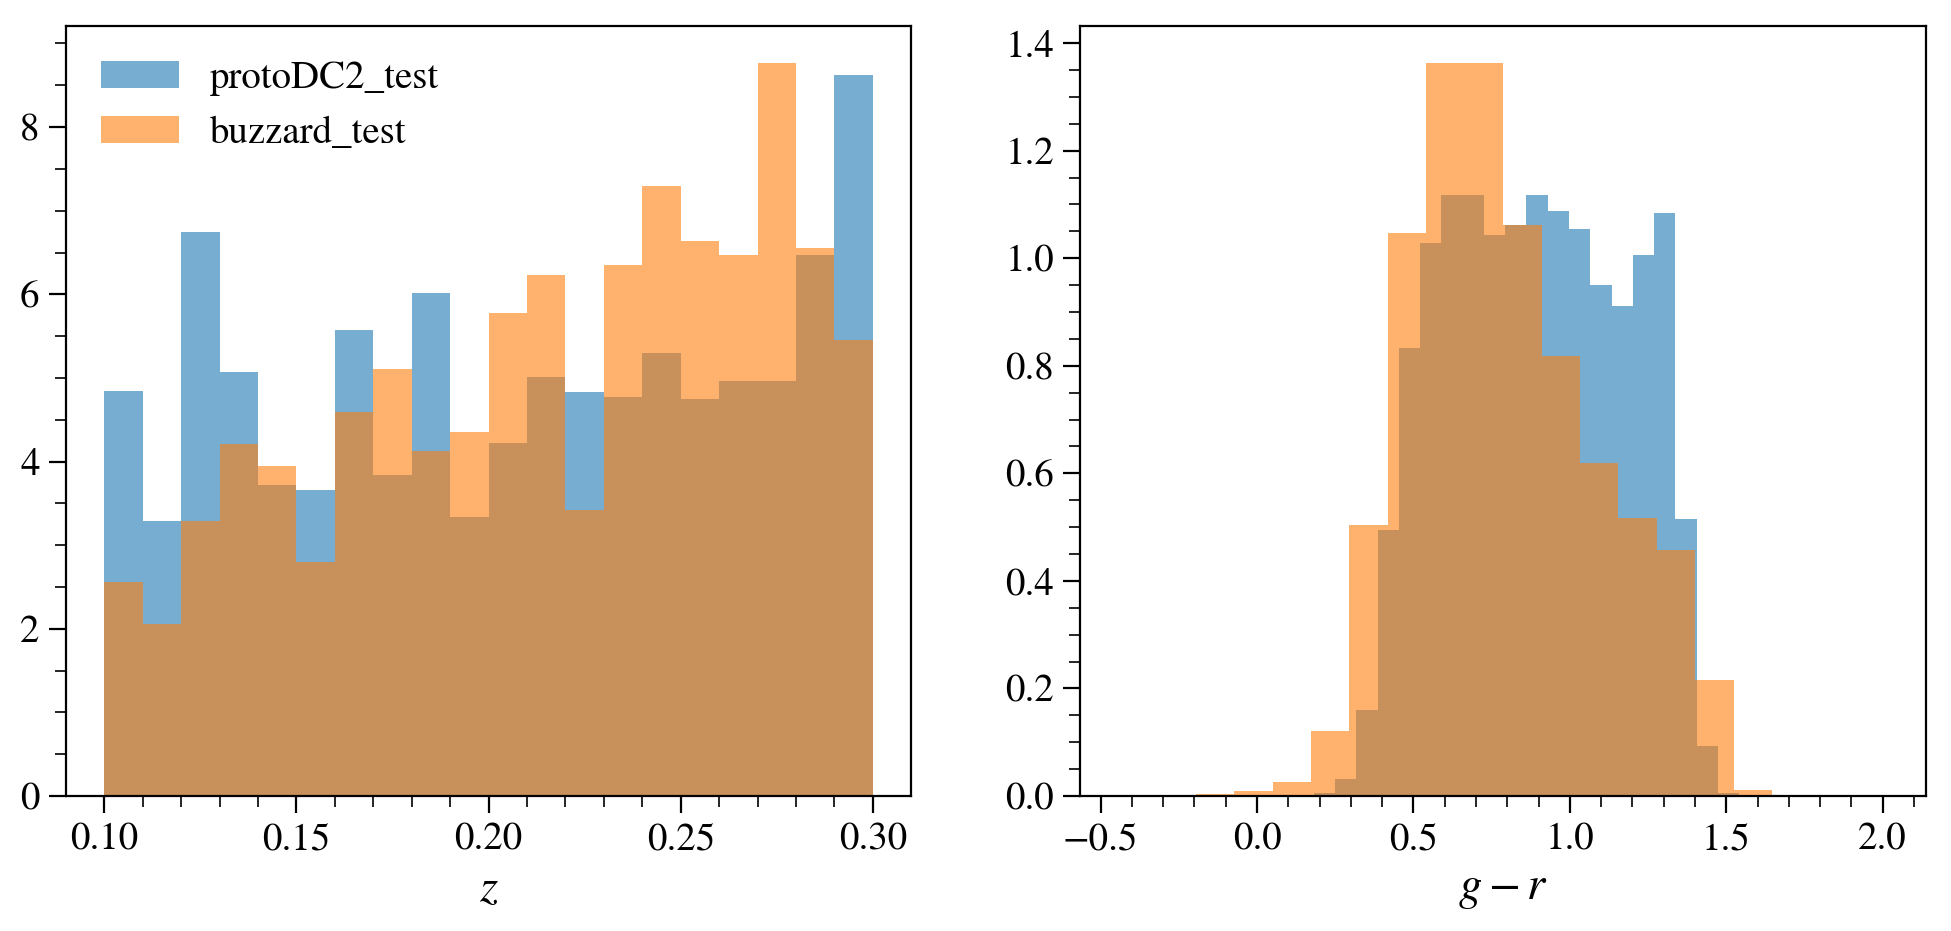

In [32]:
fig, ax = plt.subplots(ncols=2, figsize=(12,5), dpi=100)

for label, gc_this in gc_all.items():
    mag_g = gc_this.first_available('mag_g_lsst', 'mag_g_sdss', 'mag_g_des', 'mag_true_g_lsst', 'mag_true_g_sdss', 'mag_true_g_des')
    mag_r = gc_this.first_available('mag_r_lsst', 'mag_r_sdss', 'mag_r_des', 'mag_true_r_lsst', 'mag_true_r_sdss', 'mag_true_r_des')
    redshift = gc_this.first_available('redshift_true', 'redshift')
    quantities_needed = [mag_g, mag_r, redshift]
    
    data = Table(gc_this.get_quantities(quantities_needed, [redshift + '> 0.1', redshift + '< 0.3']))
    
    data = data[np.isfinite(data[mag_g]) & np.isfinite(data[mag_r])]
    data = data[data[mag_r] < 22.0]
    
    ax[0].hist(data[redshift], 20, normed=True, alpha=0.6, label=label);
    ax[1].hist(data[mag_g] - data[mag_r], 20, normed=True, alpha=0.6);

ax[0].legend(frameon=False);
ax[0].set_xlabel('$z$');
ax[1].set_xlabel('$g-r$');

## Add-on catalogs

This is an example to load "add-on" catalogs which can be joined to the main catalog with pandas

In [33]:
import pandas as pd

In [34]:
gc = GCRCatalogs.load_catalog('protoDC2_test')
gc_tidal = GCRCatalogs.load_catalog('protoDC2_addon_tidal')

/global/common/software/lsst/common/miniconda/current/lib/python3.6/site-packages/GCRCatalogs/alphaq.py:105: UserWarning: No md5 sum specified in the config file
  warnings.warn('No md5 sum specified in the config file')


In [35]:
data = pd.DataFrame(gc.get_quantities(['galaxy_id', 'ra', 'dec'])).set_index('galaxy_id')
data_tidal = pd.DataFrame(gc_tidal.get_quantities(gc_tidal.list_all_quantities())).set_index('galaxy_id').join(data)